In [4]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Hyperparamter 
m = 8 # number of training example
input_size = 1 # number of dimension
output_size = 1 # dimension of vector of y

learning_rate = 0.01 # learning rate
num_epochs = 5

In [35]:
# dataset 
x = np.array([[1.2],[3.4],[4.5],[6.7],[6.8],[7.89],[10.6],[11.34]],dtype=np.float32) # important to specify the datatype 
y = np.array([[4.25],[6.67],[7.32],[9.2],[9.4],[10.00],[13.0],[15.6]],dtype=np.float32) 

Text(0, 0.5, 'y')

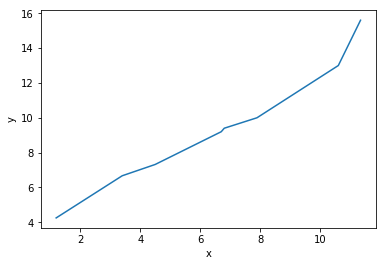

In [13]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [15]:
model = nn.Linear(input_size,output_size)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [36]:
# Training 
for epoch in range(num_epochs):
    # load tha data
    inputs = torch.from_numpy(x)
    target = torch.from_numpy(y)
    
    #forward pass
    y_hat = model(inputs)
    loss = criterion(y_hat,target) # loss calculate
    
    # zeroing the gradient ...as it accumlates
    optimizer.zero_grad()
    
    #backpropagation
    loss.backward()
    optimizer.step()
    
    print("Epoch {}/{}: Loss: {:.4f}".format(epoch+1,num_epochs,loss.item()))

Epoch 1/5: Loss: 1.1843
Epoch 2/5: Loss: 1.1781
Epoch 3/5: Loss: 1.1720
Epoch 4/5: Loss: 1.1660
Epoch 5/5: Loss: 1.1600


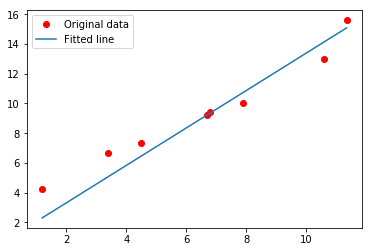

In [40]:
# plot the graph 
predicted = model(torch.from_numpy(x)).detach().numpy()
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'data/models/LinearModel.ckpt')